In [1]:
# Emma Jaud, Saumya Gupta, Ryan Clorfeine, Timothy Walker

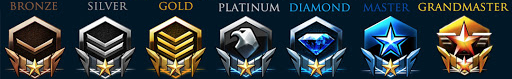

# Starcraft
In this project we will be looking at a players actions to predict a players league using the Starcraft dataset. Blizzard (StarCraft publisher) would find our model useful for determining the appropriate rank for an incoming player. The ranks are as following Bronze, Silver, Gold, Platinum, Diamond, Master, GrandMaster, and Professional leagues. In the dataset they are coded 1-8. 

In [1]:
#starting imports
import warnings
warnings.simplefilter("ignore")
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
import time

#standard imports
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

#DecisionTree imports
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

#NaiveBayes import
from sklearn.naive_bayes import GaussianNB

#KNN import
from sklearn.neighbors import KNeighborsClassifier

#SVC import
from sklearn.svm import SVC

#Neural Network import
from sklearn.neural_network import MLPClassifier

#Ensemble imports
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

In [2]:
%matplotlib inline

In [3]:
#reading in the data from csv
starcraft_data = pd.read_csv("Skillcraft_Dataset.csv")
starcraft_data

,GameID,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
0,52,5,27,10,3000,143.7180,0.003515,0.000220,7,0.000110,0.000392,0.004849,32.6677,40.8673,4.7508,28,0.001397,6,0.000000,0.000000
1,55,5,23,10,5000,129.2322,0.003304,0.000259,4,0.000294,0.000432,0.004307,32.9194,42.3454,4.8434,22,0.001194,5,0.000000,0.000208
2,56,4,30,10,200,69.9612,0.001101,0.000336,4,0.000294,0.000461,0.002926,44.6475,75.3548,4.0430,22,0.000745,6,0.000000,0.000189
3,57,3,19,20,400,107.6016,0.001034,0.000213,1,0.000053,0.000543,0.003783,29.2203,53.7352,4.9155,19,0.000426,7,0.000000,0.000384
4,58,3,32,10,500,122.8908,0.001136,0.000327,2,0.000000,0.001329,0.002368,22.6885,62.0813,9.3740,15,0.001174,4,0.000000,0.000019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3390,10089,8,?,?,?,259.6296,0.020425,0.000743,9,0.000621,0.000146,0.004555,18.6059,42.8342,6.2754,46,0.000877,5,0.000000,0.000000
3391,10090,8,?,?,?,314.6700,0.028043,0.001157,10,0.000246,0.001083,0.004259,14.3023,36.1156,7.1965,16,0.000788,4,0.000000,0.000000
3392,10092,8,?,?,?,299.4282,0.028341,0.000860,7,0.000338,0.000169,0.004439,12.4028,39.5156,6.3979,19,0.001260,4,0.000000,0.000000
3393,10094,8,?,?,?,375.8664,0.036436,0.000594,5,0.000204,0.000780,0.004346,11.6910,34.8547,7.9615,15,0.000613,6,0.000000,0.000631


In [4]:
# cleaning data
starcraft_data.replace('?', np.NaN, inplace=True)

print("Total num missing values:\n\n", starcraft_data.isnull().sum())

Total num missing values:

 GameID                   0
LeagueIndex              0
Age                     55
HoursPerWeek            56
TotalHours              57
APM                      0
SelectByHotkeys          0
AssignToHotkeys          0
UniqueHotkeys            0
MinimapAttacks           0
MinimapRightClicks       0
NumberOfPACs             0
GapBetweenPACs           0
ActionLatency            0
ActionsInPAC             0
TotalMapExplored         0
WorkersMade              0
UniqueUnitsMade          0
ComplexUnitsMade         0
ComplexAbilitiesUsed     0
dtype: int64


In [5]:
# line-wise deletion with null entries
starcraft_data_clean = starcraft_data.dropna()
starcraft_data_clean = starcraft_data_clean.astype(float)

# max out total hours for unreasonably high values
maxTotalHours = 5000
starcraft_data_clean['TotalHours'] = starcraft_data_clean['TotalHours'].where(starcraft_data_clean['TotalHours'] <= maxTotalHours, maxTotalHours) 

# max out weekly hours for unreasonably high values
maxHoursPerWeek = 70
starcraft_data_clean['HoursPerWeek'] = starcraft_data_clean['HoursPerWeek'].where(starcraft_data_clean['HoursPerWeek'] <= maxHoursPerWeek, maxHoursPerWeek)

### Why eliminate null and LeagueIndex 8
In eliminating the entries with null inputs(Age, HoursPerWeek and TotalHours played), we also eliminate the LeagueIndex 8 which is Professional leagues. This also allows us to predict an average persons LeagueIndex: Bronze, Silver, Gold, Platinum, Diamond, Master, and GrandMaster since the average person is most likely not on a Professional League. 

### Why max out TotalHours and HoursPerWeek
Unlike most features which are programatically gathered, Age, HoursPerWeek and TotalHours appear to be self-reported data. As such, there are a few instances where these features take on unreasonable values (like 168 hours played per week, or 100000 total hours). We set a maximum value for these features such that the algorithms are not affected by these outliers. The max values of 5000 and 70 were chosen for TotalHours and HoursPerWeek respectively, as they were seen as the most reasonable upper-limit of usefulness.

In [6]:
#checking to see if data has no missing values
print("Total num missing values:\n\n", starcraft_data_clean.isnull().sum())

Total num missing values:

 GameID                  0
LeagueIndex             0
Age                     0
HoursPerWeek            0
TotalHours              0
APM                     0
SelectByHotkeys         0
AssignToHotkeys         0
UniqueHotkeys           0
MinimapAttacks          0
MinimapRightClicks      0
NumberOfPACs            0
GapBetweenPACs          0
ActionLatency           0
ActionsInPAC            0
TotalMapExplored        0
WorkersMade             0
UniqueUnitsMade         0
ComplexUnitsMade        0
ComplexAbilitiesUsed    0
dtype: int64


## Separate the feature columns from the class label column
For this next part we are seperating our feature columns from our class label which is LeagueIndex. We will also drop GameID since this is not relevant to our analysis since this just states what number player they are.

In [7]:
starcraft_data_Y = starcraft_data_clean['LeagueIndex']

starcraft_data_X = starcraft_data_clean.drop(['LeagueIndex', 'GameID'],axis=1)

print(starcraft_data_X.shape)
print(starcraft_data_Y.shape)

(3338, 18)
(3338,)


min 16.0
max 44.0


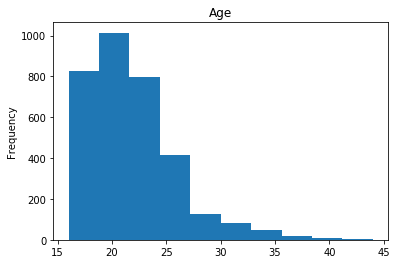

In [8]:
# DATA VISUALIZER
features = ['Age', 'HoursPerWeek', 'TotalHours', 'APM', 'SelectByHotkeys', 'AssignToHotkeys', 'UniqueHotkeys', 'MinimapAttacks', 'MinimapRightClicks', 'NumberOfPACs', 'GapBetweenPACs', 'ActionLatency', 'ActionsInPAC', 'TotalMapExplored', 'WorkersMade', 'UniqueUnitsMade', 'ComplexUnitsMade', 'ComplexAbilitiesUsed']

# select feature
sel = features[0]

column = starcraft_data_X[sel]
print("min", column.min())
print("max", column.max())
column.plot(kind='hist', title=sel)

In [9]:
starcraft_data_X

,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
0,27.0,10.0,3000.0,143.7180,0.003515,0.000220,7.0,0.000110,0.000392,0.004849,32.6677,40.8673,4.7508,28.0,0.001397,6.0,0.0,0.000000
1,23.0,10.0,5000.0,129.2322,0.003304,0.000259,4.0,0.000294,0.000432,0.004307,32.9194,42.3454,4.8434,22.0,0.001194,5.0,0.0,0.000208
2,30.0,10.0,200.0,69.9612,0.001101,0.000336,4.0,0.000294,0.000461,0.002926,44.6475,75.3548,4.0430,22.0,0.000745,6.0,0.0,0.000189
3,19.0,20.0,400.0,107.6016,0.001034,0.000213,1.0,0.000053,0.000543,0.003783,29.2203,53.7352,4.9155,19.0,0.000426,7.0,0.0,0.000384
4,32.0,10.0,500.0,122.8908,0.001136,0.000327,2.0,0.000000,0.001329,0.002368,22.6885,62.0813,9.3740,15.0,0.001174,4.0,0.0,0.000019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3335,20.0,8.0,400.0,158.1390,0.013829,0.000504,7.0,0.000217,0.000313,0.003583,36.3990,66.2718,4.5097,30.0,0.001035,7.0,0.0,0.000287
3336,16.0,56.0,1500.0,186.1320,0.006951,0.000360,6.0,0.000083,0.000166,0.005414,22.8615,34.7417,4.9309,38.0,0.001343,7.0,0.0,0.000388
3337,21.0,8.0,100.0,121.6992,0.002956,0.000241,8.0,0.000055,0.000208,0.003690,35.5833,57.9585,5.4154,23.0,0.002014,7.0,0.0,0.000000
3338,20.0,28.0,400.0,134.2848,0.005424,0.000182,5.0,0.000000,0.000480,0.003205,18.2927,62.4615,6.0202,18.0,0.000934,5.0,0.0,0.000000


## Decision Tree

In [14]:
# standardize the features
scaler = StandardScaler()

#create a PCA
pca = PCA()

# Create a decision tree using entropy as the split criterion
clf = DecisionTreeClassifier(criterion='entropy')

#create a pipeline that does scaling, then PCA, then KNN
pipe = Pipeline(steps=[('scaler', scaler), ('pca', pca), ('clf', clf)])

#Set up the parameters you want to tune for each of your pipeline steps
#Parameters of pipelines can be set using ‘__’ separated parameter names:
param_grid = {
    'pca__n_components': list(range(1, 19)), #find how many principal componenet to keep
    "clf__max_depth": [5,10,15,20], "clf__min_samples_leaf": [5,10,15,20], 'clf__max_features': ['auto', 'sqrt', 'log2']}

# pass the pipeline and the parameters into a GridSearchCV with a 5-fold cross validation
# call fit() on the GridSearchCV and pass in the unscaled data (X_values, Y_values)
# print out the best_score_ and best_params_ from the GridSearchCV
# Create the GridSearchCV object using a 5-fold cross validation
grid_search = GridSearchCV(pipe, param_grid, cv=5)
grid_search.fit(starcraft_data_X, starcraft_data_Y)

print("best_params_:", grid_search.best_params_)
print("best_score:", grid_search.best_score_)

best_params_: {'clf__max_depth': 5, 'clf__max_features': 'log2', 'clf__min_samples_leaf': 20, 'pca__n_components': 5}
best_score: 0.37956860395446373


## Naive Bayes

In [16]:
# create GaussianNB classifier
gnb = GaussianNB()

# run a 5-fold cross validation
scores = cross_val_score(gnb, starcraft_data_X, starcraft_data_Y, cv=5) 

# cross_val_predict
from sklearn.model_selection import cross_val_predict
cross_y_pred = cross_val_predict(gnb, starcraft_data_X, starcraft_data_Y, cv=5)

# classification_report
from sklearn.metrics import classification_report
print("Classification Report:\n", classification_report(starcraft_data_Y, cross_y_pred))

Classification Report:
               precision    recall  f1-score   support

         1.0       0.43      0.42      0.42       167
         2.0       0.26      0.34      0.29       347
         3.0       0.32      0.16      0.21       553
         4.0       0.38      0.47      0.42       811
         5.0       0.40      0.35      0.37       804
         6.0       0.52      0.57      0.54       621
         7.0       0.18      0.31      0.23        35

    accuracy                           0.39      3338
   macro avg       0.36      0.37      0.36      3338
weighted avg       0.39      0.39      0.38      3338



## KNN

In [17]:
#create a scaler
scaler = MinMaxScaler()

#create a PCA
pca = PCA()

#create a KNN classifier
knn = KNeighborsClassifier()

#create a pipeline that does scaling, then PCA, then KNN
pipe = Pipeline(steps=[('scaler', scaler), ('pca', pca), ('knn', knn)])

#Set up the parameters you want to tune for each of your pipeline steps
#Parameters of pipelines can be set using ‘__’ separated parameter names:
param_grid = {
    'pca__n_components': list(range(1, 19)), #find how many principal componenet to keep
    'knn__n_neighbors': list(range(1, 30)),  #find the best value of k
}

# pass the pipeline and the parameters into a GridSearchCV with a 5-fold cross validation
# call fit() on the GridSearchCV and pass in the unscaled data (X_values, Y_values)
# print out the best_score_ and best_params_ from the GridSearchCV
# Create the GridSearchCV object using a 5-fold cross validation
grid_search = GridSearchCV(pipe, param_grid, cv=5)
grid_search.fit(starcraft_data_X, starcraft_data_Y)

print("best_params_:", grid_search.best_params_)
print("best_score:", grid_search.best_score_)

best_params_: {'knn__n_neighbors': 28, 'pca__n_components': 9}
best_score: 0.3906530856800479


In [18]:
cross_y_pred = cross_val_predict(grid_search, starcraft_data_X, starcraft_data_Y, cv=5)
print("Classification Report:\n", classification_report(starcraft_data_Y, cross_y_pred))

Classification Report:
               precision    recall  f1-score   support

         1.0       0.41      0.19      0.26       167
         2.0       0.29      0.23      0.26       347
         3.0       0.29      0.28      0.29       553
         4.0       0.34      0.43      0.38       811
         5.0       0.38      0.41      0.39       804
         6.0       0.50      0.48      0.49       621
         7.0       0.00      0.00      0.00        35

    accuracy                           0.37      3338
   macro avg       0.32      0.29      0.29      3338
weighted avg       0.37      0.37      0.36      3338



## SVMs

In [19]:
# standardize the features
scaler = StandardScaler()

# create SVC object
svc = SVC()

# create a pipeline
pipe = Pipeline(steps=[('scaler', scaler), ('svc', svc)])

# for the 'svm' part of the pipeline, tune the 'kernel' hyperparameter
param_grid = {'svc__kernel': ['linear', 'rbf', 'poly', 'sigmoid'], 'svc__C': [i for i in range(50, 101, 10)]}

# GridSearchCV using pipeline
grid_search = GridSearchCV(pipe, param_grid, cv=5)
grid_search.fit(starcraft_data_X, starcraft_data_Y)

print("best_params_:", grid_search.best_params_)
print("best_score:", grid_search.best_score_)

best_params_: {'svc__C': 50, 'svc__kernel': 'linear'}
best_score: 0.4212103055721989


In [20]:
cross_y_pred = cross_val_predict(grid_search, starcraft_data_X, starcraft_data_Y, cv=5)
print("Classification Report:\n", classification_report(starcraft_data_Y, cross_y_pred))

Classification Report:
               precision    recall  f1-score   support

         1.0       0.50      0.22      0.31       167
         2.0       0.36      0.38      0.37       347
         3.0       0.38      0.23      0.29       553
         4.0       0.38      0.50      0.43       811
         5.0       0.41      0.46      0.43       804
         6.0       0.56      0.54      0.55       621
         7.0       0.00      0.00      0.00        35

    accuracy                           0.42      3338
   macro avg       0.37      0.33      0.34      3338
weighted avg       0.42      0.42      0.41      3338



## Neural Nets

In [21]:
# standardize the features
scaler = StandardScaler()

mlpc = MLPClassifier()

# create a pipeline
pipe = Pipeline(steps=[('scaler', scaler), ('mlpc', mlpc)])

param_grid3 = {'mlpc__hidden_layer_sizes': [(10,), (20,), (30,)], 'mlpc__activation': ['logistic', 'tanh', 'relu']}

grid_search = GridSearchCV(pipe, param_grid3, cv=5)
grid_search.fit(starcraft_data_X, starcraft_data_Y)

print("best_params_:", grid_search.best_params_)

grid3_score = cross_val_score(grid_search, starcraft_data_X, starcraft_data_Y, cv=5)

print("Accuracy of Neural Net:", grid3_score.mean()*100, '\b%')

best_params_: {'mlpc__activation': 'relu', 'mlpc__hidden_layer_sizes': (20,)}


/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Accuracy of Neural Net: 42.26595224534438 %


In [22]:
cross_y_pred = cross_val_predict(grid_search, starcraft_data_X, starcraft_data_Y, cv=5)
print("Classification Report:\n", classification_report(starcraft_data_Y, cross_y_pred))

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Classification Report:
               precision    recall  f1-score   support

         1.0       0.46      0.29      0.36       167
         2.0       0.32      0.31      0.32       347
         3.0       0.34      0.27      0.30       553
         4.0       0.38      0.44      0.41       811
         5.0       0.40      0.43      0.42       804
         6.0       0.55      0.59      0.57       621
         7.0       0.00      0.00      0.00        35

    accuracy                           0.41      3338
   macro avg       0.35      0.33      0.34      3338
weighted avg       0.41      0.41      0.41      3338



## Ensembles

#### Random Forest Classifier

In [25]:
rfc = RandomForestClassifier()

param_grid4 = {'max_depth': [i for i in range(35, 56)], 'min_samples_leaf': [8, 10, 12], 'max_features': ['sqrt', 'log2']}

grid_search = GridSearchCV(rfc, param_grid4, cv=5)
grid_search.fit(starcraft_data_X, starcraft_data_Y)

print("best_params_:", grid_search.best_params_)

grid4_score = cross_val_score(grid_search, starcraft_data_X, starcraft_data_Y, cv=5)

print("Accuracy of RandomForestClassifier:", grid4_score.mean()*100, '\b%')

best_params_: {'max_depth': 51, 'max_features': 'sqrt', 'min_samples_leaf': 8}


/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Accuracy of RandomForestClassifier: 40.05111925399636 %


In [26]:
cross_y_pred = cross_val_predict(grid_search, starcraft_data_X, starcraft_data_Y, cv=5)
print("Classification Report:\n", classification_report(starcraft_data_Y, cross_y_pred))

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: Deprecation

Classification Report:
               precision    recall  f1-score   support

         1.0       0.53      0.31      0.39       167
         2.0       0.35      0.30      0.32       347
         3.0       0.32      0.29      0.30       553
         4.0       0.35      0.43      0.39       811
         5.0       0.37      0.39      0.38       804
         6.0       0.52      0.53      0.52       621
         7.0       0.00      0.00      0.00        35

    accuracy                           0.39      3338
   macro avg       0.35      0.32      0.33      3338
weighted avg       0.39      0.39      0.39      3338



#### Ada Boost Classifier

In [27]:
abc = AdaBoostClassifier()

param_grid5 = {'n_estimators': [i for i in range(50, 251, 25)]}

grid_search = GridSearchCV(abc, param_grid5, cv=5)
grid_search.fit(starcraft_data_X, starcraft_data_Y)

print("best_params_:", grid_search.best_params_)

grid5_score = cross_val_score(grid_search, starcraft_data_X, starcraft_data_Y, cv=5)

print("Accuracy of AdaBoostClassifier:", grid5_score.mean()*100, '\b%')

best_params_: {'n_estimators': 125}


/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Accuracy of AdaBoostClassifier: 29.69208276896299 %


In [28]:
cross_y_pred = cross_val_predict(grid_search, starcraft_data_X, starcraft_data_Y, cv=5)
print("Classification Report:\n", classification_report(starcraft_data_Y, cross_y_pred))

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Classification Report:
               precision    recall  f1-score   support

         1.0       0.12      0.35      0.18       167
         2.0       0.08      0.05      0.06       347
         3.0       0.25      0.30      0.27       553
         4.0       0.32      0.27      0.29       811
         5.0       0.39      0.23      0.29       804
         6.0       0.42      0.56      0.48       621
         7.0       0.00      0.00      0.00        35

    accuracy                           0.30      3338
   macro avg       0.23      0.25      0.22      3338
weighted avg       0.31      0.30      0.29      3338



## For our final model we are going to expand on Neural Nets

After looking through all our accuracy percentages with different algoirthms we can conclude that SVM and Neural Nets give us the best accuracies. Now we are gonna dive in a little deeper to Neural Nets.

In [10]:
# INSTALL KERAS PACKAGE(S) IN ANACONDA > ENVIRONMENTS
from keras.backend import clear_session
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, BatchNormalization, Reshape
from keras.callbacks import LearningRateScheduler
from keras.optimizers import Adam

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.compose import ColumnTransformer 
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline

Using TensorFlow backend.


## Formatting Data
We divide the Y values by 7 to scale the ranks from 0 to 1. We then convert to a numpy array to match the input of the X values after they are scaled. We scale the X values using StandardScalar, as it produces the best results. This converts each X value into a Z-score for that value, and occurs in the baseline_model method through an sklearn Pipeline. This avoids data leakage by excluding test data in the scaling.

In [11]:
# less cumbersome
X_data, y_data = starcraft_data_X, starcraft_data_Y

In [12]:
# RUN ONLY ONCE!!!
y_data /= 7
y_data = y_data.values

In [13]:
print(X_data)
print()
print(y_data)
print()

print("X_data shape", X_data.shape, "\ny_data shape", y_data.shape)

       Age  HoursPerWeek  TotalHours       APM  SelectByHotkeys  \
0     27.0          10.0      3000.0  143.7180         0.003515   
1     23.0          10.0      5000.0  129.2322         0.003304   
2     30.0          10.0       200.0   69.9612         0.001101   
3     19.0          20.0       400.0  107.6016         0.001034   
4     32.0          10.0       500.0  122.8908         0.001136   
...    ...           ...         ...       ...              ...   
3335  20.0           8.0       400.0  158.1390         0.013829   
3336  16.0          56.0      1500.0  186.1320         0.006951   
3337  21.0           8.0       100.0  121.6992         0.002956   
3338  20.0          28.0       400.0  134.2848         0.005424   
3339  22.0           6.0       400.0   88.8246         0.000844   

      AssignToHotkeys  UniqueHotkeys  MinimapAttacks  MinimapRightClicks  \
0            0.000220            7.0        0.000110            0.000392   
1            0.000259            4.0       

### Defining a Keras model
We used the keras package to have more control over the structure and output of the learning model. Here is the architecture found to work best:

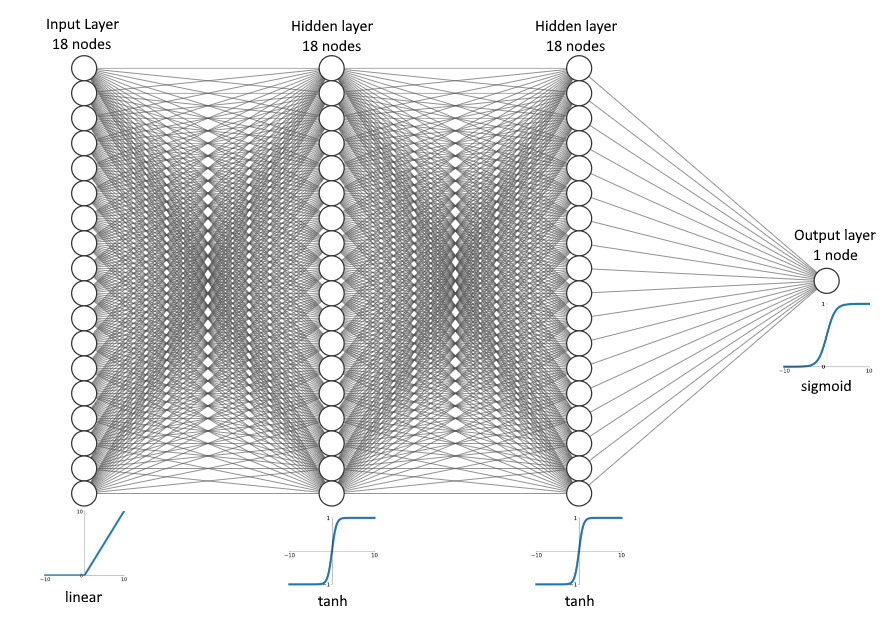

We experimented with the numbers of hidden layers (1, 2, 3), number of nodes per layer, activation functions (relu, tanh), having BatchNormalization and Dropout layers, and loss functions (Mean Squared Error, Mean Absolute Error). The prediction output is a number between 0 and 1, where 1 represents a rank of 7 while 0.1428 represents a rank of 1. We initialize the kernel according to a normal distribution to improve consistency between training runs.

Batch Normalization re-scales the inputs in between layers, which in theory helps improve convergence and stability. In our case, however, it didn't prove particularly useful.

Dropout randomly chooses a proportion of nodes to deactivate in each training pass. This greatly mitigates overtraining over many epochs, as the nodes are forced to compensate for the missing nodes, increasing each node's scope of responsibility.

## Final Model

In [14]:
# define base model
def baseline_model(verbose=0):
    # create model
    model = Sequential()
    model.add(Dense(18, input_dim=18, kernel_initializer='normal', activation='tanh')) # hidden layer 1
#     model.add(BatchNormalization())
    model.add(Dropout(0.4))

    model.add(Dense(18, kernel_initializer='normal', activation='tanh')) # hidden layer 2
#     model.add(BatchNormalization())
    model.add(Dropout(0.4))

    model.add(Dense(1, kernel_initializer='normal', activation='sigmoid')) # output layer
    
    # compile model
    model.compile(loss='mean_squared_error', optimizer='adam')
    
    if verbose==1:
        print(model.summary())
    
    # Create a pipeline to scale the x values without data leakage
    steps = [('scaler', StandardScaler()), ('model', model)]
    pipeline = Pipeline(steps)

    return pipeline

In [15]:
# This method is used to evaluate our network.
def validate_network(m, X, Y, verbose=0):
    
    # convert decimal scores to predictions, subtract true values to obtain list of errors
    results = [x-7*y for x, y in zip([min(7, round(7*p[0])) for p in m.predict(X)], Y)]
    
    # array of error frequencies:
    # buckets[0] = (error = 0) correct prediction
    # buckets[1] = (error = +-1) one-off
    # buckets[2] = (error = +-2) two-off
    # buckets[3] = three-off or more
    buckets = [0]*4
    
    for r in results:
        if r==0:
            buckets[0] += 1
        elif abs(r)==1:
            buckets[1] += 1
        elif abs(r)==2:
            buckets[2] += 1
        else:
            buckets[3] += 1
            
    if verbose==1:
        for i in range(3):
            cumulative = round(100*sum(buckets[:i+1])/sum(buckets),4)
            print('correct within',i,'ranks',cumulative,'percent of the time')
    else:
        return buckets

### Test the model
we test out the model, splitting the data into 70% train and 30% test. We find that 500 epochs is sufficient for inducing convergence. In other words, the model passes the training data into the model 500 times. The 'batch_size' or mini-batch size of 32 means that the model will backpropogate and update the weights every 32 records. This speeds up training and helps avoid local minima in convergence.

In [16]:
clear_session()
model = baseline_model(verbose=1)
model.fit(X_data, y_data, model__epochs=500, model__verbose=1, model__validation_split=0.30, model__batch_size=32)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 18)                342       
_________________________________________________________________
dropout_1 (Dropout)          (None, 18)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 18)                342       
_________________________________________________________________
dropout_2 (Dropout)          (None, 18)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 19        
Total params: 703
Trainable params: 703
Non-trainable params: 0
_________________________________________________________________
None
Train on 2336 samples, validate on 1002 samples
Epoch 1/500
2336/2336 [==============================] - 1s 265us/ste

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('model',
                 <keras.engine.sequential.Sequential object at 0x00000218066933C8>)],
         verbose=False)

In [17]:
validate_network(model, X_data, y_data, verbose=1)

correct within 0 ranks 41.2522 percent of the time
correct within 1 ranks 90.1138 percent of the time
correct within 2 ranks 99.4608 percent of the time


These results are promising, so we move forward with the model evaluation and training.

### Wrapping the model
We wrap the keras model to look like an sklearn model so that we may use cross_val_score on it with our custom scoring criteria.

In [18]:
class KerasModel(BaseEstimator, ClassifierMixin):  
    
    # constructor
    def __init__(self):
        self.model = baseline_model()
    
    # train the model
    def fit(self, X, y=None):
        self.model.fit(X, y, model__epochs=500, model__verbose=0, model__batch_size=32)
        return self
    
    # make a prediction
    def predict(self, X):
        return(self.model.predict(X))
    
    # score the model
    def score(self, X, y):
        # 'score' function expects a number, but we want to know the quality of predictions (exactly right, one-off, etc)
        # so, we add our scores to a global container and return 0
        scores.append(validate_network(self.model, X, y))
        return(0) 

## Final evaluation
Now that we have designed our model and know that it works, it's time to evaluate it with a 5-fold cross-validation.

In [19]:
# clear any existing models from memory
clear_session()

# scores container will be populated by our custom 'scores' method in the wrapper
scores = []

# perform k-fold cross-validation
folds = 5
model = KerasModel()
cross_val_score(model, X_data, y_data, cv=folds)

array([0, 0, 0, 0, 0])

In [20]:
# aggregate scores into one final bucket
total = [0]*4
for score in scores:
    for i in range(4):
        total[i] += score[i]
        
# obtain cumulative results
for i in range(3):
    cumulative = round(100*sum(total[:i+1])/sum(total),4)
    print('correct within',i,'ranks',cumulative,'percent of the time')

correct within 0 ranks 40.2636 percent of the time
correct within 1 ranks 90.1438 percent of the time
correct within 2 ranks 99.1911 percent of the time


## Closing Thoughts
The model performs very well in the end. On a lucky run, the model can be as high as 42% accurate, with 92% accuracy within 1 rank. The final model would be trained on all the data as seen below. Training many networks, picking the luckiest runs and aggregating them into an ensemble could lead to an improved model by a few percentage points. However, due to the nature of the data and problem itself, we predict noise will strongly limit any model from classifying the records with exceptional accuracy. Players may be under or overranked (even intentionally so), and player skill fluctuates on a game-by-game basis. With that said, we are pleased with the performance of this model, and believe Blizzard would find it effective for placing new player accounts into the correct skill group, even after just one or two games.

In [21]:
clear_session()
final_model = baseline_model()
final_model.fit(X_data, y_data, model__epochs=1000, model__verbose=0, model__batch_size=32)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('model',
                 <keras.engine.sequential.Sequential object at 0x000002180AB84888>)],
         verbose=False)

In [22]:
import pickle
filename = 'finalized_model.sav'
pickle.dump(final_model, open(filename, 'wb'))